# Assignment 2. Rheological behaviour of cosmetic creams

It is a sample of rheological behaviour of some cosmetic creams, taken from [here](https://www.rheologylab.com/articles/emulsion-stability/)

![image.png](CSVP-of-Lotions-and-Creams-names-removed.webp)

What conclusions would you get from that about the behaviour of day creams in front of body creams? 

Let's consider the case of the body lotion C. Fit the Power Law model, get coefficients and plot it. You will see that it is not good. You will see that it does not agree with very low (_zero-shear rate viscosity_) or high (_infinity-shear rate viscosity_) shear stress. There are some other models that deals with this behaviour. The molt usual is the [Carreau model](https://en.wikipedia.org/wiki/Carreau_fluid). Apply this law to obtain a more accurate model of this fluid and discuss it.


## Group 1 Solution (Pol Padilla, Ferran De Miguel, Alejandro Sanchez)

### Behaviour of day creams in front of body creams
On the one hand, day creams seem to have a high viscosity for all applied stresses up to approximately 100 Pa. When reaching this stress, the viscosity drops rapidly and the day creams start to act as low viscous fluids. On the other hand, body lotions have a high viscosity for low stresses, and it decreases more slowly than in day creams as the stress increase. However, for stresses of 100 Pa or more, their viscosities are similar to those of day creams for these stresses, meaning that they act as low viscous fluids, too.

### Power Law Model for Body Lotion C

The Power Law Model defines the shear stress as follows:
$$
\sigma = K\dot{\gamma}^n \tag{1}
$$

And the viscosity as:
$$
\mu(\dot{\gamma}) = K(\dot{\gamma})^{n-1} \tag{2}
$$

From Eq. (1), the shear rate can be found:
$$
\dot{\gamma} = \left(\frac{\sigma}{K}\right)^{1/n}
$$

And replacing it in Eq. (2):
$$
\mu(\dot{\gamma}) = K\left(\left(\frac{\sigma}{K}\right)^{1/n}\right)^{n-1} = K\left(\frac{\sigma}{K}\right)^\frac{n-1}{n} = \mu(\sigma)
$$

In [1]:
# Defining symbols and functions:
import numpy as np
import sympy as sp
K,n,sigmasym,musym,t = sp.symbols('K,n,sigma,mu,t')
sigma = sp.Function('sigma')
gamma = sp.Function('gamma')
mu = sp.Function('mu')

# Power Law Model:
sigma = sp.Eq(sigmasym,K*gamma(t).diff(t)**n)
mu = sp.Eq(musym,K*(gamma(t).diff(t))**(n-1))

# Get the shear rate:
gammadot = sp.solve(sigma,gamma(t).diff(t))
shear_rate = gammadot[0]

# Get viscosity vs stress:
f = mu.replace(gamma(t).diff(t),shear_rate).simplify()
display(f)
f = f.rhs

Eq(mu, K*((sigma/K)**(1/n))**(n - 1))

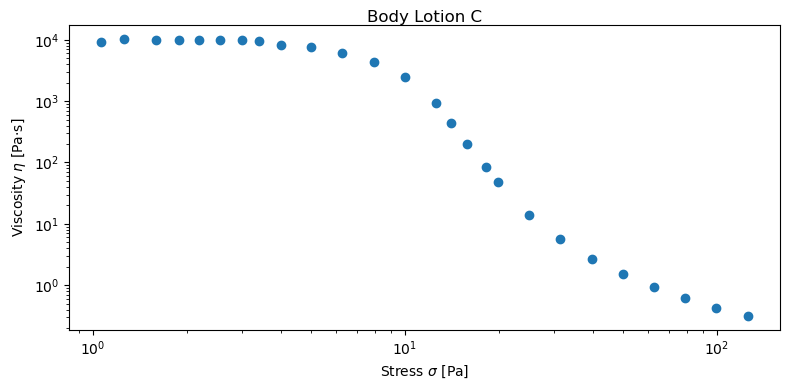

In [2]:
# Regression to fit body lotion C's curve into the Power Law Model:
import scipy.optimize as opt
import matplotlib.pyplot as plt
[xdata,ydata] = np.loadtxt("bodyLotionC.csv",delimiter=',').T

fig,ac = plt.subplots(figsize=(8,4))
ac.scatter(xdata,ydata)
ac.set_xscale('log')
ac.set_yscale('log')
ac.set_xlabel(r'Stress $\sigma$ [Pa]')
ac.set_ylabel(r'Viscosity $\eta$ [Pa·s]')
ac.set_title("Body Lotion C", va='top')
fig.tight_layout()

In [3]:
def func_power(sigma,K,n):
    return K*(sigma/K)**((n-1)/n)

popt, pcov = opt.curve_fit(func_power,xdata,ydata)
[Kres,nres] = popt

In [4]:
ydata_reg = func_power(xdata,Kres,nres)

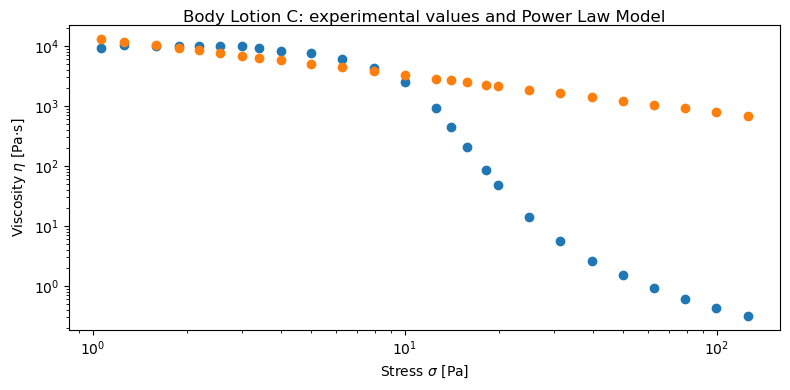

In [5]:
fig,ac = plt.subplots(figsize=(8,4))
ac.scatter(xdata,ydata)
ac.scatter(xdata,ydata_reg)
ac.set_xscale('log')
ac.set_yscale('log')
ac.set_xlabel(r'Stress $\sigma$ [Pa]')
ac.set_ylabel(r'Viscosity $\eta$ [Pa·s]')
ac.set_title("Body Lotion C: experimental values and Power Law Model", va='top')
fig.tight_layout()

It can be seen that the Power Law Model does not fit correctly with the experimental values. The same is seen when representing the viscosity $\eta$ in front of the shear rate $\dot{\gamma}$ instead of the shear stress $\sigma$ (knowing that at each point $\sigma = \eta\dot{\gamma}$).

In [6]:
shear_rate_data = np.divide(xdata,ydata) # Shear rate values of the body lotion C

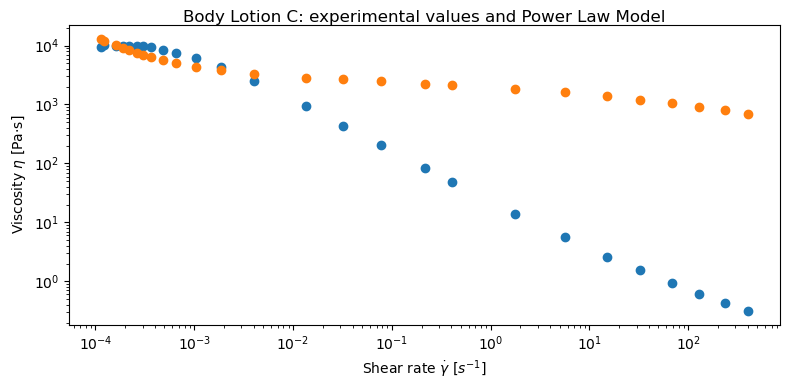

In [7]:
fig,ac = plt.subplots(figsize=(8,4))
ac.scatter(shear_rate_data,ydata)
ac.scatter(shear_rate_data,ydata_reg)
ac.set_xscale('log')
ac.set_yscale('log')
ac.set_xlabel(r'Shear rate $\dot{\gamma}$ [$s^{-1}$]')
ac.set_ylabel(r'Viscosity $\eta$ [Pa·s]')
ac.set_title("Body Lotion C: experimental values and Power Law Model", va='top')
fig.tight_layout()

### Carreau Model for Body Lotion C
Then, we will apply the Carreau model, which describes more accurately this kind of behaviours, to see whether it could be used to describe Body Lotion C's behaviour. Carreau model relates the viscosity $\mu$ with the shear rate $\dot{\gamma}$ in the following way:
$$
\mu_{eff}(\dot{\gamma}) = \mu_{inf}+(\mu_0-\mu_{inf})\left(1+(\lambda\dot{\gamma})^2\right)^\frac{n-1}{2}
$$

In [8]:
def carreau(sr,muinf,mu0,lambdat,n):
    return muinf+(mu0-muinf)*(1+(lambdat*sr)**2)**((n-1)/2)

popt, pcov = opt.curve_fit(carreau,shear_rate_data,ydata)
[muinf,mu0,lambdat,n] = popt

In [9]:
y_carreau = carreau(shear_rate_data,muinf,mu0,lambdat,n)

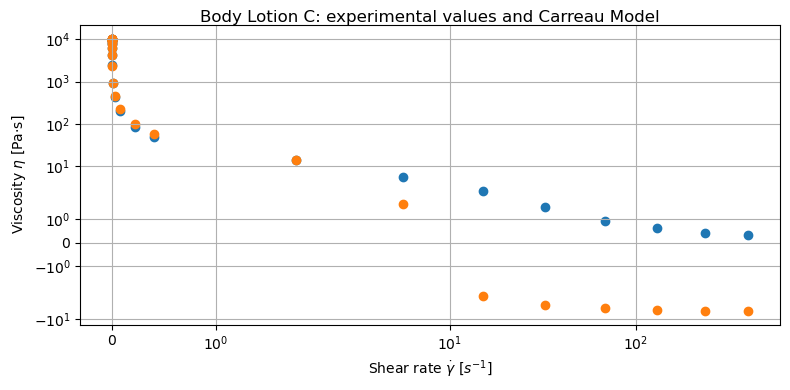

In [10]:
fig,ac = plt.subplots(figsize=(8,4))
ac.scatter(shear_rate_data,ydata)
ac.scatter(shear_rate_data,y_carreau)
ac.set_xscale('symlog')
ac.set_yscale('symlog')
ac.set_xlabel(r'Shear rate $\dot{\gamma}$ [$s^{-1}$]')
ac.set_ylabel(r'Viscosity $\eta$ [Pa·s]')
ac.set_title("Body Lotion C: experimental values and Carreau Model", va='top')
ac.grid(True, which='both')
fig.tight_layout()

And representing the viscosity $\eta$ as a function of the shear stress $\sigma$:

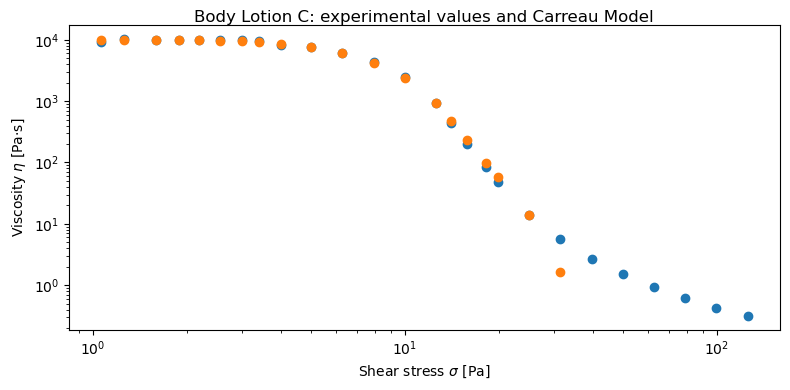

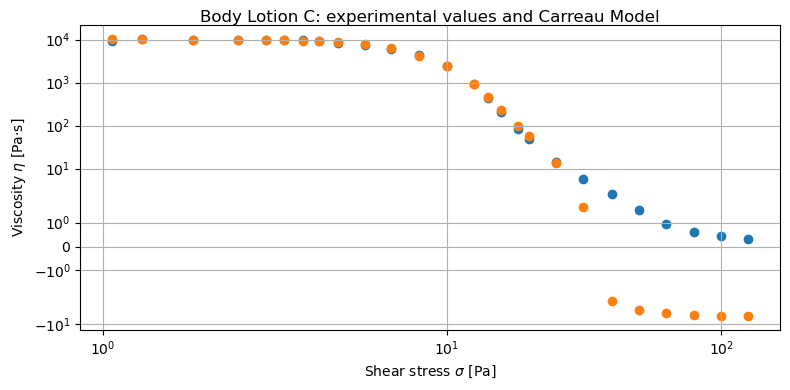

In [11]:
fig,ac = plt.subplots(figsize=(8,4))
ac.scatter(xdata,ydata)
ac.scatter(xdata,y_carreau)
ac.set_xscale('log')
ac.set_yscale('log')
ac.set_xlabel(r'Shear stress $\sigma$ [Pa]')
ac.set_ylabel(r'Viscosity $\eta$ [Pa·s]')
ac.set_title("Body Lotion C: experimental values and Carreau Model", va='top')
fig.tight_layout()

fig,ac = plt.subplots(figsize=(8,4))
ac.scatter(xdata,ydata)
ac.scatter(xdata,y_carreau)
ac.set_xscale('symlog')
ac.set_yscale('symlog')
ac.set_xlabel(r'Shear stress $\sigma$ [Pa]')
ac.set_ylabel(r'Viscosity $\eta$ [Pa·s]')
ac.set_title("Body Lotion C: experimental values and Carreau Model", va='top')
ac.grid(True, which='both')
fig.tight_layout()

It can be seen that the Carreau model is quite more accurate when fitting to the behaviour of the Body Lotion C than the Power Law model. However, the Carreau model starts to diverge for stresses higher than 12 Pa, approximately, as negative values for the viscosity are pictured.

Now, imposing $\mu_0$ and $\mu_{inf}$ as the first (at zero shear rate) and last (at infinite shear rate) values, respectively, from the experimental data of Body Lotion C, the Carreau model is fitted again. This is done to avoid negative values for the viscosity.

In [12]:
mu0 = ydata[0]
muinf = ydata[-1]

def carreau(sr,lambdat,n):
    return muinf+(mu0-muinf)*(1+(lambdat*sr)**2)**((n-1)/2)

popt, pcov = opt.curve_fit(carreau,shear_rate_data,ydata)
[lambdat,n] = popt

In [13]:
y_carreau2 = carreau(shear_rate_data,lambdat,n)

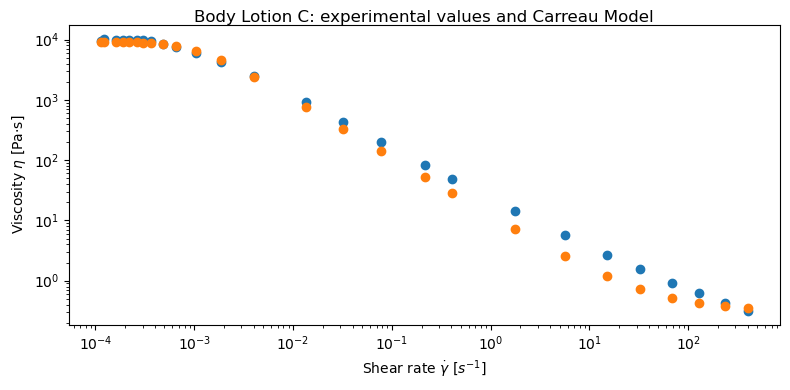

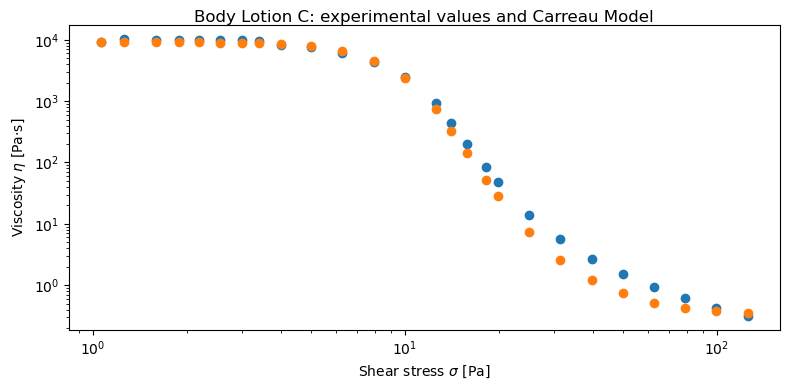

In [14]:
fig,ac = plt.subplots(figsize=(8,4))
ac.scatter(shear_rate_data,ydata)
ac.scatter(shear_rate_data,y_carreau2)
ac.set_xscale('log')
ac.set_yscale('log')
ac.set_xlabel(r'Shear rate $\dot{\gamma}$ [$s^{-1}$]')
ac.set_ylabel(r'Viscosity $\eta$ [Pa·s]')
ac.set_title("Body Lotion C: experimental values and Carreau Model", va='top')
fig.tight_layout()

fig,ac = plt.subplots(figsize=(8,4))
ac.scatter(xdata,ydata)
ac.scatter(xdata,y_carreau2)
ac.set_xscale('log')
ac.set_yscale('log')
ac.set_xlabel(r'Shear stress $\sigma$ [Pa]')
ac.set_ylabel(r'Viscosity $\eta$ [Pa·s]')
ac.set_title("Body Lotion C: experimental values and Carreau Model", va='top')
fig.tight_layout()

Now that $\mu_0$ and $\mu_{inf}$ have been imposed, it is seen that the Carreau model fits much better to the experimental data.

### Relative errors with respect to experimental data
Finally, the relative errors of each of the three regressions with respect to the experimental values of the viscosity are going to be pictured:

In [15]:
error_powerlaw = abs(100*(ydata_reg-ydata)/ydata) # In percentage
error_carreau = abs(100*(y_carreau-ydata)/ydata) # In percentage
error_carreau2 = abs(100*(y_carreau2-ydata)/ydata) # In percentage

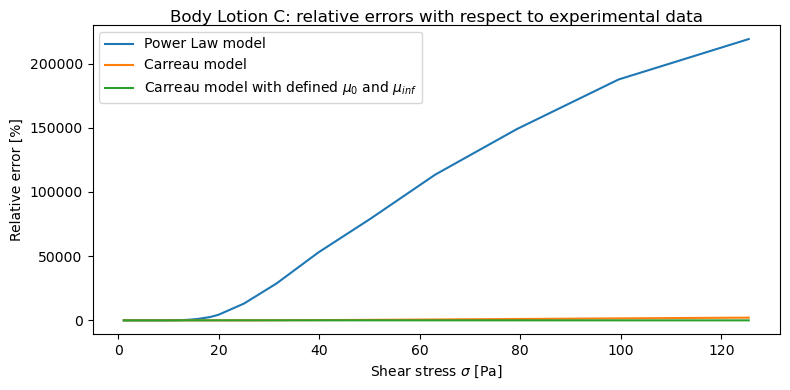

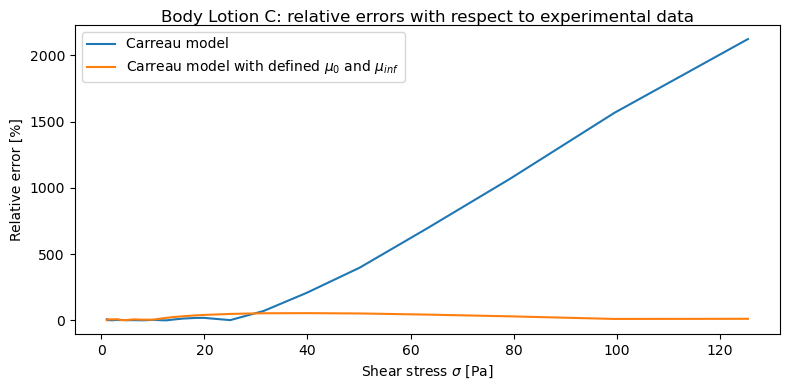

In [16]:
fig,ac = plt.subplots(figsize=(8,4))
ac.plot(xdata,error_powerlaw,label=r'Power Law model')
ac.plot(xdata,error_carreau,label=r'Carreau model')
ac.plot(xdata,error_carreau2,label=r'Carreau model with defined $\mu_0$ and $\mu_{inf}$')
ac.set_xlabel(r'Shear stress $\sigma$ [Pa]')
ac.set_ylabel(r'Relative error [%]')
ac.set_title("Body Lotion C: relative errors with respect to experimental data", va='top')
legend = ac.legend()
fig.tight_layout()

fig,ac = plt.subplots(figsize=(8,4))
ac.plot(xdata,error_carreau,label=r'Carreau model')
ac.plot(xdata,error_carreau2,label=r'Carreau model with defined $\mu_0$ and $\mu_{inf}$')
ac.set_xlabel(r'Shear stress $\sigma$ [Pa]')
ac.set_ylabel(r'Relative error [%]')
ac.set_title("Body Lotion C: relative errors with respect to experimental data", va='top')
legend = ac.legend()
fig.tight_layout()

With these errors, it can be confirmed again that the Power Law model is not suitable for these kind of fluids. Then, although the Carreau model fits better to the experimental values, if the viscosity values at zero and infinite shear rates are known, the error of this model is reduced much more, being the best model to describe this type of behaviour.